In [30]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import cmocean
from xgcm import Grid

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Reading in the 1/4 degree data and performing energy decomposition

In [31]:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)
av = xr.open_dataset('averages_00031502.nc', decode_times=False)  #100 5-day averages

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.25deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [32]:
%%time
xh_025 = fs.xh.values
yh_025 = fs.yh.values

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'].mean('time').fillna(0.)
depth=h.sum('zl')
print('done part 1')

u  = av['u'];  u = grid.interp(u,axis='X')
ubar=u.mean('time')

print('done part 2')
v  = av['v'];  v = grid.interp(v,axis='Y')
vbar=v.mean('time')

uprime=u-ubar
vprime=v-vbar

done part 1
done part 2
CPU times: user 9.7 s, sys: 5.68 s, total: 15.4 s
Wall time: 25.4 s


In [33]:
%%time
# The mean BT and BC KE values:
u_BT = (u*h/depth).sum('zl'); v_BT = (v*h/depth).sum('zl')
u_BC = u-u_BT; v_BC = v-v_BT;

ubar_BT=(ubar*h/depth).sum('zl'); 
ubar_BC=ubar-ubar_BT;

vbar_BT=(vbar*h/depth).sum('zl')
vbar_BC=vbar-vbar_BT;

print('done 1')

#Eddy BT and BC KE parts:
uprime_BT=(uprime*h/depth).sum('zl')
uprime_BC=uprime-uprime_BT
vprime_BT=(vprime*h/depth).sum('zl')
vprime_BC=vprime-vprime_BT
    
KE_eddy_BT=(0.5*(vprime_BT**2+uprime_BT**2)).mean('time')
KE_eddy_BC=((0.5*(vprime_BC**2+uprime_BC**2)*h/depth).sum('zl')).mean('time')


# #Total kinetic energy:
KE_BT_tot = 0.5*(u_BT**2+v_BT**2).mean('time')
KE_BC_tot = ((0.5*(u_BC**2+v_BC**2)*h/depth).sum('zl')).mean('time')
KE_tot=KE_BT_tot+KE_BC_tot


fraction_BT_025=KE_BT_tot/KE_tot
fraction_BT_eddy_025=KE_eddy_BT/KE_tot

fraction_BC_025=KE_BC_tot/KE_tot
fraction_BC_eddy_025=KE_eddy_BC/KE_tot

done 1
CPU times: user 5.21 s, sys: 5.25 s, total: 10.5 s
Wall time: 10.5 s


done


Text(0.5, 1.0, '1/4$^\\circ$ KE Fractions')

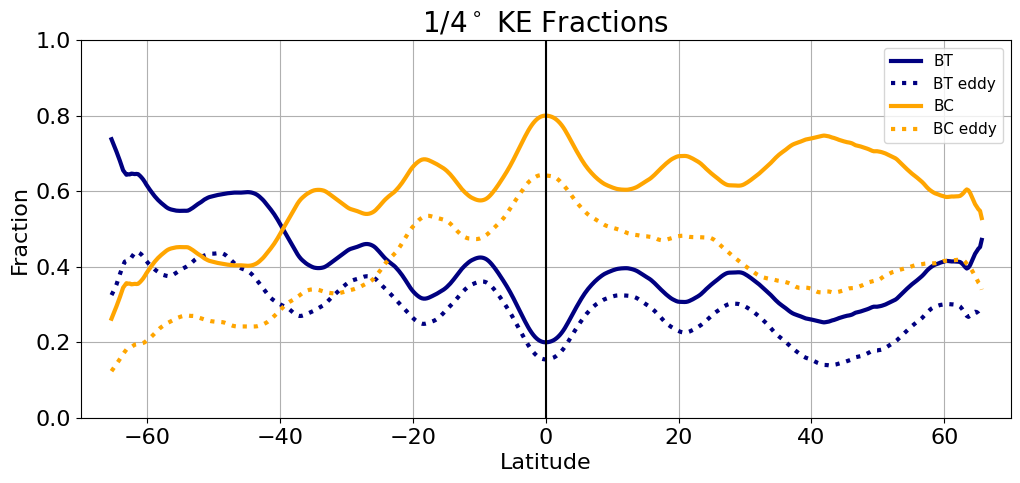

In [36]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.
window=30

plt.figure(figsize=(12, 5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh_025,np.convolve((fraction_BT_025.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3)
print('done')
plt.plot(yh_025,np.convolve((fraction_BT_eddy_025.mean('xh').compute()), np.ones((window,))/window, mode='same'),':',c=[0,0,0.5],linewidth=3)
plt.grid()
plt.plot(yh_025,np.convolve((fraction_BC_025.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
plt.plot(yh_025,np.convolve((fraction_BC_eddy_025.mean('xh').compute()), np.ones((window,))/window, mode='same'),':',c='#FFA500',linewidth=3)

plt.legend(['BT','BT eddy','BC','BC eddy'],loc='upper right',fontsize=11,handlelength=2)
plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
plt.xlim(-70,70); plt.xticks(fontsize=16);
plt.ylim(0,1); plt.yticks(fontsize=16);
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('Fraction',fontsize=16)
plt.title('1/4$^\circ$ KE Fractions',fontsize=20)

## Reading in the 1/32 degree data and performing energy decomposition

In [37]:
#1/32 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
                        'sub05/ocean.stats.nc','sub06/ocean.stats.nc','sub07/ocean.stats.nc','sub08/ocean.stats.nc'], decode_times=False)
av = xr.open_dataset('averages_00002702.nc', decode_times=False)  #20 5-day averages
#av = xr.open_mfdataset(['averages_00002302.nc','averages_00002402.nc','averages_00002502.nc','averages_00002602.nc','averages_00002702.nc'], decode_times=False)  #20 5-day averages

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.03125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [38]:
%%time
xh_003125 = fs.xh.values
yh_003125 = fs.yh.values

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'].mean('time').fillna(0.)
depth=h.sum('zl')
print('done part 1')

u  = av['u'];  u = grid.interp(u,axis='X')
ubar=u.mean('time')

print('done part 2')
v  = av['v'];  v = grid.interp(v,axis='Y')
vbar=v.mean('time')

uprime=u-ubar
vprime=v-vbar

done part 1
done part 2
CPU times: user 2min 20s, sys: 1min 19s, total: 3min 40s
Wall time: 3min 49s


In [41]:
%%time
u_BT = (u*h/depth).sum('zl'); v_BT = (v*h/depth).sum('zl')
u_BC = u-u_BT; v_BC = v-v_BT;

ubar_BT=(ubar*h/depth).sum('zl'); 
ubar_BC=ubar-ubar_BT;

vbar_BT=(vbar*h/depth).sum('zl')
vbar_BC=vbar-vbar_BT;

print('done 1')

uprime_BT=(uprime*h/depth).sum('zl')
uprime_BC=uprime-uprime_BT
vprime_BT=(vprime*h/depth).sum('zl')
vprime_BC=vprime-vprime_BT
    
KE_eddy_BT=(0.5*(vprime_BT**2+uprime_BT**2)).mean('time')
KE_eddy_BC=((0.5*(vprime_BC**2+uprime_BC**2)*h/depth).sum('zl')).mean('time')


KE_BT_tot = 0.5*(u_BT**2+v_BT**2).mean('time')
KE_BC_tot = ((0.5*(u_BC**2+v_BC**2)*h/depth).sum('zl')).mean('time')
KE_tot=KE_BT_tot+KE_BC_tot; KE_tot=KE_tot.where(KE_tot>1e-4)


fraction_BT_003125=KE_BT_tot/KE_tot
fraction_BT_eddy_003125=KE_eddy_BT/KE_tot

fraction_BC_003125=KE_BC_tot/KE_tot
fraction_BC_eddy_003125=KE_eddy_BC/KE_tot

done 1
CPU times: user 1min 56s, sys: 4min 3s, total: 5min 59s
Wall time: 8min 50s


done


Text(0.5, 1.0, '1/32$^\\circ$ KE Fractions')

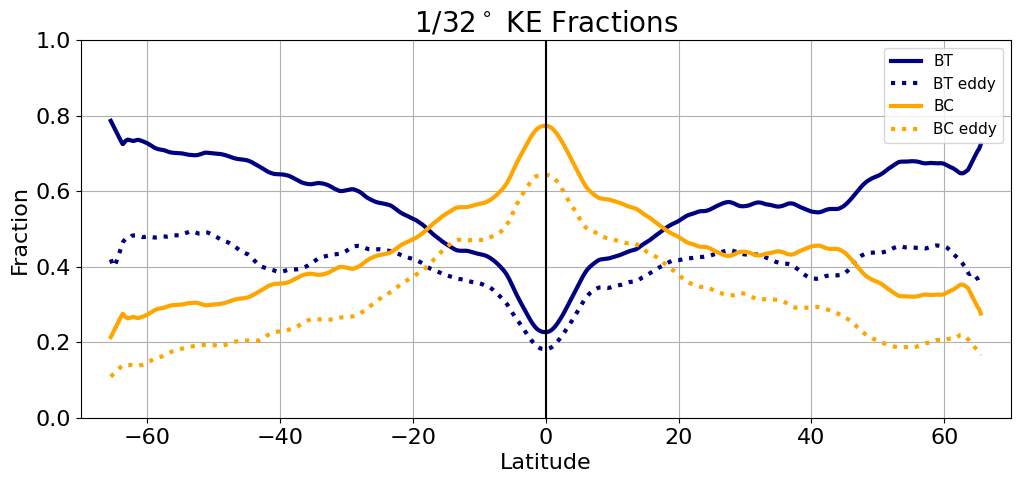

In [43]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.
window=240

plt.figure(figsize=(12, 5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh_003125,np.convolve((fraction_BT_003125.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3)
print('done')
plt.plot(yh_003125,np.convolve((fraction_BT_eddy_003125.mean('xh').compute()), np.ones((window,))/window, mode='same'),':',c=[0,0,0.5],linewidth=3)
plt.grid()
plt.plot(yh_003125,np.convolve((fraction_BC_003125.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
plt.plot(yh_003125,np.convolve((fraction_BC_eddy_003125.mean('xh').compute()), np.ones((window,))/window, mode='same'),':',c='#FFA500',linewidth=3)

plt.legend(['BT','BT eddy','BC','BC eddy'],loc='upper right',fontsize=11,handlelength=2)
plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
plt.xlim(-70, 70); plt.xticks(fontsize=16);
plt.ylim(0,1); plt.yticks(fontsize=16);
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('Fraction',fontsize=16)
plt.title('1/32$^\circ$ KE Fractions',fontsize=20)